In [62]:
from playoff_model_helpers import *

from sklearn.linear_model import LogisticRegression#,SGDClassifier

from sklearn.model_selection import cross_validate

In [2]:
df = import_data()

In [3]:
df = made_playoffs(df)

In [4]:
train,test = split_train_test(df)

In [5]:
x,y,transformer = preprocess(train)

In [6]:
model = LogisticRegression(random_state=10,max_iter=1000)
model.fit(x,y)

LogisticRegression(max_iter=1000, random_state=10)

In [64]:
cv = cross_validate(model,x,y,scoring='precision',cv=5)

In [65]:
cv['test_score'].mean()

0.6312570520595091

In [66]:
cv['test_score'].std()

0.004890608659003544

In [35]:
from sklearn.metrics import roc_curve

In [53]:
fpr,tpr,threashold = roc_curve(y,model.predict_proba(x)[:,1])

In [54]:
import matplotlib.pyplot as plt

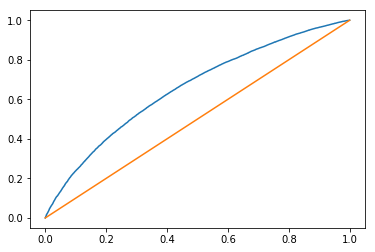

In [55]:
plt.plot(fpr,tpr,label="ROC curve")
plt.plot([0,1],[0,1])

In [42]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y,model.predict(x))

0.6055532982822893